<a href="https://colab.research.google.com/github/ivancarhuapoma/Projects/blob/main/CO2_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regresion - Parte 1**

En este notebook aprenderemos a utilizar la librería *scikit-learn* para implementar una regresión lineal simple. Para ello utilizaremos el dataset de emisión de CO2 de autos. Con este dividiremos nuestros datos en dos partes: (1) *un conjunto de prueba*, y (2) *un conjunto de entrenamiento*. Luego, crearemos un modelo con el *conjunto de entrenamiento* y lo evaluaremos haciendo un test con el *conjunto de prueba*. Finalmente, usaremos el modelo para predecir un valor desconocido.

In [ ]:
#importacion de librerias a utilizar
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

**Subir el archivo**

Subir el archivo *FuelConsumptionCo2.csv*

**Entendiendo los datos**

FuelConsumptionCo2.csv:

Hemos subido el archivo de consumo de combustible, *FuelConsumptionCo2.csv*, que contiene un ranking de consumo de combustible y emisiones de dioxido de carbono de autos de poca potencia en Canada.


*   **MODELYEAR**: 2014
*   **MAKE**: Acura
*   **MODEL**: ILX
*   **VEHICLE CLASS**: SUV
*   **ENGINE SIZE**: 4.7
*   **CYLINDERS**: 6
*   **TRANSMISSION**: A6
*   **FUEL CONSUMPTION in CITY (L/100 km)**: 9.9
*   **FUEL CONSUMPTION in HWT (L/100 km)**: 8.9
*   **FUEL CONSUMPTION in COMB (L/100 km)**: 9.2
*   **CO2 EMISSION (g/km)**: 182 --> low --> 0





**Lectura de datos**

In [ ]:
#Lectura del archivo
df = pd.read_csv('/content/sample_data/FuelConsumptionCo2(1).csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**Exploración de datos**

Primero realizaremos una exploración descriptiva de nuestros datos.

In [ ]:
#Resumen de datos
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Ahora seleccionaremos solo algunas columnas o features para una mejor exploración

In [ ]:
#Acceso a las columnas de un dataframe
#cdf = df[['ENGINESIZE']] #lista de valores continios
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']] #matriz

#cdf. #para ver todas las filas
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Ahora imprimiremos cada una de estas columnass o features.

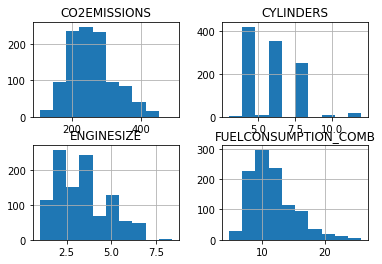

In [ ]:
#visualizacion de las variables en histogramas
viz= cdf[[ 'CYLINDERS','ENGINESIZE' , 'CO2EMISSIONS','FUELCONSUMPTION_COMB']]

#type(viz) para ver el tipo de dato(dataframe)

viz.hist()
plt.show()


Ahora imprimiresmos cada una de estos features vs la Emission, para ver como se relacionan linealmente.

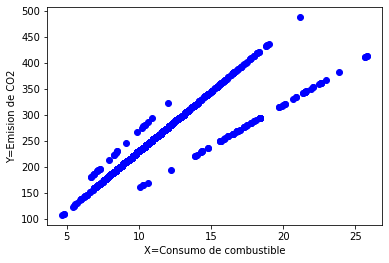

In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS, color= 'blue')
plt.xlabel('X=Consumo de combustible')
plt.ylabel('Y=Emision de CO2')
plt.show()

In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS, color= 'blue')
plt.xlabel('X=Consumo de combustible')
plt.ylabel('Y=Emision de CO2')
plt.show()

**Práctica**

Imprimir la relacion lineal entre las variables *CYLINDER* vs *CO2EMISSIONS*


**Creando dataset de entrenamiento y prueba**

Ahora dividiremos los datos en dos conjuntos: un dataset de  de entrenamiento y un dataset de prueba. Ambos conjuntos son mutuamente excluyentes; esto permitirá una mayor exactitud de evaluación, debido a que el dataset de de prueba no es parte del dataset que ha sido utilizado para entrenar al modelo.

Nosotros conocermos el resultado de cada punto del dataset, y debido a que estos datos no han sido utilizados para entrenar al modelo, este no tiene conocimiento de los resultados de cada uno de estos puntos.

In [ ]:
#Generacion del dataset de entranamiento y el dataset de prueba
len(df)

1067

In [ ]:
#Generacion del dataset de entrenamiento y el dataset de prueba 
#80% para el entrenamiento y 20% para las pruebas
msk = np.random.rand(len(df)) < 0.8
#msk
train = cdf[msk]
test = cdf[~msk]

print(msk)
print(~msk)

[ True False  True ...  True  True False]
[False  True False ... False False  True]


**Modelo de regresión simple**

Regresión lineal ajusta un modelo de línea con coeficientes B=(B1, ... Bn) para minimizar el error entre la variable indpendiente X y la variable dependiente Y (suma de cuadrados de dla diferencia entre X y Y).




**Entrenamiento de datos**

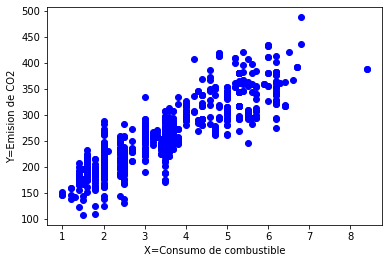

In [ ]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color= 'blue')
plt.xlabel('X=Consumo de combustible')
plt.ylabel('Y=Emision de CO2')
plt.show()

**Modelamiento**

Usando el paquete *sklearn* para modelar los datos.

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

#Los coeficiente gradiente y el intercepto

print('Coeficiente (Gradiente) - Tetal: ', regr.coef_)
print('Intercepto - Teta0:', regr.intercept_)

Coeficiente (Gradiente) - Tetal:  [[39.19737821]]
Intercepto - Teta0: [124.67726261]


Como se mencionó antes, el **coeficiente** y el **intercepto** en la regresión lineal simple son los parámetros de la línea ajustada. 

Debido a que se va está trabajando con una regresión lineal simple con únicamente 2 parámetros, los cuales son el intercepto y la gradiente, con el paquete sklearn se puede estimar estos directamente desde los datos que estamos manejando. Tener en cuenta que todos estos datos deberían estar disponibles para cruzar y calcular los parámetros.

**Impresión de resultados**

Nosotros podemos imprimir el ajuste de linea sobre los datos.

Text(0, 0.5, 'Y= Emision del CO2')

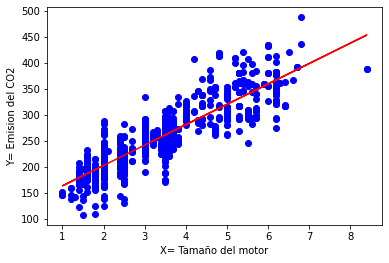

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color= 'blue')
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('X= Tamaño del motor')
plt.ylabel('Y= Emision del CO2')
#plt.show()

**Evaluación**

Comparemos los valores actuales con los valores predichos para calcular la exactitud (accuracy) de un modelo de regresión. Métricas de evaluación juegan un rol principal en el desarrollo de un modelo, ya que estas proveen insights a las áreas que requieren una mejora.

Existen diferentes métricas de evaluación de modelos, aca utilizaremos MSE para calcular la exactitud (accuracy) de nuestro modelo basado en el dataset de prueba:


*   **Mean absolute error**: promedio de los valores absolutos de errores.
*   **Mean Square error (MSE)**: promedio de los errores al cuadrado. Es mas popular que *Mean absolute error* debido a que se enfoca mas en los errores mas grandes. Esto es debido a que el térmno cuadrado incrementa exponencialmente los grandes errores en comparación con los errores pequeños.
*   **Root Mean Squared Error (RMSE)**: R squared no es un error, pero es una métrica popular para calcular la exactitud (acccuracy) del modelo. Representa lo cerca que estan los datos de la línea de regresión ajustada. Mientras mas alto sea el R-square, mejor se ajustará el modelo a sus datos. El mejor resultado posible es 1 y este puede ser negativo (lo que indica que el modelo es totalmente malo).

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_= regr.predict(test_x)

print('Mean absolute error: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('MSE : %.2f' %np.mean((test_y_ - test_y)**2))
print('R2 - scote (RMSE): %2.f' % r2_score(test_y_, test_y))

Mean absolute error: 23.87
MSE : 997.11
R2 - scote (RMSE):  1
